# ANN Classification on Alphabets Data



## 1. Imports & Load Data

In [1]:

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset (make sure the CSV is in the same folder as this notebook)
file_path = 'Alphabets_data.csv'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"{file_path} not found. Upload it to the notebook directory or change the path.")

data = pd.read_csv(file_path)
print('Dataset shape:', data.shape)
display(data.head())
display(data.info())
display(data.describe())


Dataset shape: (20000, 17)


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


None

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


## 2. Data Preprocessing

- Drop or impute missing values
- Encode labels
- Scale numeric features
- Train-test split

In [2]:

# --- Basic preprocessing ---
# Drop missing values
data_clean = data.dropna().reset_index(drop=True)

# Separate features and target (assuming target is last column)
X = data_clean.iloc[:, :-1]
y = data_clean.iloc[:, -1]

# Encode categorical features if any
from sklearn.preprocessing import LabelEncoder

# Convert all object (string) columns in X to numeric codes
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Encode target labels
target_le = LabelEncoder()
y_enc = target_le.fit_transform(y)
class_names = target_le.classes_
print('Classes:', list(class_names))

# Normalize numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Classes: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15)]
Train shape: (16000, 16) Test shape: (4000, 16)


## 3. Build Default ANN Model (Keras)

In [5]:

import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_model(input_dim=X_train.shape[1], num_classes=len(class_names),
                 neurons=64, activation='relu', learning_rate=0.001, dropout_rate=0.2):
    model = Sequential([
        Input(shape=(input_dim,)),  # <-- use Input layer here
        Dense(neurons, activation=activation),
        Dropout(dropout_rate),
        Dense(max(neurons//2, 8), activation=activation),
        Dense(num_classes, activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and show summary
model = create_model()
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696 (14.44 KB)

 Trainable params: 3,696 (14.44 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Train & Evaluate Default Model

Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3989 - loss: 1.7394 - val_accuracy: 0.4544 - val_loss: 1.4687
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4664 - loss: 1.4104 - val_accuracy: 0.4903 - val_loss: 1.3298
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4909 - loss: 1.3225 - val_accuracy: 0.5019 - val_loss: 1.2689
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5064 - loss: 1.2737 - val_accuracy: 0.5303 - val_loss: 1.2206
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5236 - loss: 1.2372 - val_accuracy: 0.5503 - val_loss: 1.1916
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5276 - loss: 1.2105 - val_accuracy: 0.5597 - val_loss: 1.1745
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5359 - loss: 1.1861 - val_accuracy: 0.5603 - val_loss: 1.1588
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5462 - loss: 1.1758 - val_accuracy: 0.

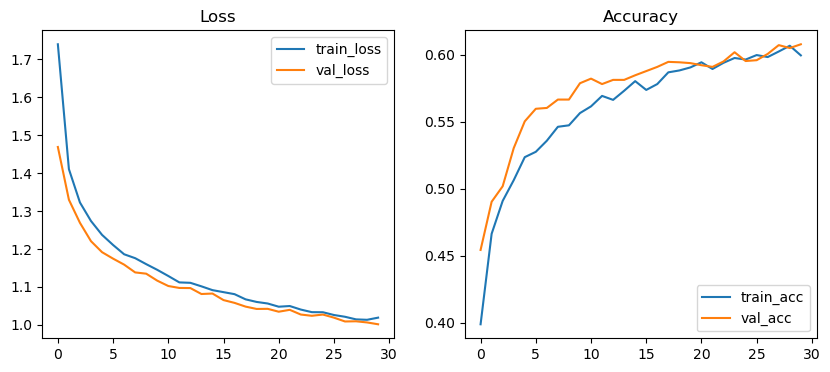

In [6]:

# Training default model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=[es], verbose=1)

# Evaluate on test set
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report

# Get actual class names present in test data
labels = unique_labels(y_test, y_pred)
print('\nClassification Report:\n', classification_report(y_test, y_pred, zero_division=0))

print('Accuracy:', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', cm)

# Plot training curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()


## 5. Hyperparameter Tuning

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

#  Define the model creation function first
def create_model_sklearn(neurons=64, activation='relu', dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),   #  Use Input() layer instead of input_dim
        Dense(neurons, activation=activation),
        Dropout(dropout_rate),
        Dense(26, activation='softmax')     # 26 output classes
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model



#  Then create the KerasClassifier wrapper
keras_clf = KerasClassifier(model=create_model_sklearn, verbose=0)

#  Define hyperparameter search space
param_dist = {
    'model__neurons': [32, 64, 128],
    'model__activation': ['relu', 'tanh'],
    'model__learning_rate': [0.001, 0.01],
    'model__dropout_rate': [0.1, 0.3],
    'batch_size': [32, 64],
    'epochs': [20, 30]
}

#  Run randomized search
rs = RandomizedSearchCV(
    keras_clf,
    param_distributions=param_dist,
    n_iter=8,
    cv=2,
    verbose=2,
    n_jobs=1,
    random_state=42
)

rs_result = rs.fit(X_train, y_train)

print("Best params:", rs_result.best_params_)
print("Best CV score:", rs_result.best_score_)


Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END batch_size=64, epochs=30, model__activation=relu, model__dropout_rate=0.3, model__learning_rate=0.001, model__neurons=128; total time=   8.0s
[CV] END batch_size=64, epochs=30, model__activation=relu, model__dropout_rate=0.3, model__learning_rate=0.001, model__neurons=128; total time=   8.8s
[CV] END batch_size=64, epochs=30, model__activation=relu, model__dropout_rate=0.1, model__learning_rate=0.01, model__neurons=128; total time=   8.4s
[CV] END batch_size=64, epochs=30, model__activation=relu, model__dropout_rate=0.1, model__learning_rate=0.01, model__neurons=128; total time=   8.1s
[CV] END batch_size=64, epochs=30, model__activation=relu, model__dropout_rate=0.1, model__learning_rate=0.001, model__neurons=64; total time=   8.1s
[CV] END batch_size=64, epochs=30, model__activation=relu, model__dropout_rate=0.1, model__learning_rate=0.001, model__neurons=64; total time=   8.2s
[CV] END batch_size=64, epochs=30, mod

## 6. Evaluate Tuned Model

Evaluate the best model found by RandomizedSearchCV on the test set.

In [8]:
best_clf = rs_result.best_estimator_

# Predict probabilities and convert to class labels
y_pred_proba_tuned = best_clf.predict_proba(X_test)
y_pred_tuned = np.argmax(y_pred_proba_tuned, axis=1)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

print('Tuned Accuracy:', accuracy_score(y_test, y_pred_tuned))

# Use all class labels to prevent UndefinedMetricWarning
all_labels = np.arange(len(class_names))

print('\nTuned Classification Report:\n', 
      classification_report(
          y_test,
          y_pred_tuned,
          labels=all_labels,
          target_names=[str(c) for c in class_names],
          zero_division=0   # set undefined metrics to 0 instead of warning
      ))

cm_tuned = confusion_matrix(y_test, y_pred_tuned, labels=all_labels)
print('\nTuned Confusion Matrix:\n', cm_tuned)


Tuned Accuracy: 0.6295

Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      0.67      0.57         3
           2       0.50      0.17      0.25         6
           3       0.32      0.46      0.38        26
           4       0.54      0.41      0.46        96
           5       0.58      0.43      0.50       198
           6       0.57      0.44      0.50       365
           7       0.57      0.51      0.54       694
           8       0.72      0.87      0.79      1610
           9       0.50      0.44      0.47       472
          10       0.60      0.41      0.48       316
          11       0.53      0.68      0.60       174
          12       0.14      0.04      0.06        27
          13       0.22      0.20      0.21        10
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         0

    accuracy              

## 7. Compare Default vs Tuned

In [9]:

from pprint import pprint
from sklearn.metrics import classification_report

# Get unique classes in y_test
unique_classes = np.unique(y_test)

# Map class names to only those classes
filtered_class_names = [str(class_names[i]) for i in unique_classes]

default_metrics = classification_report(
    y_test,
    np.argmax(model.predict(X_test), axis=1),
    labels=np.arange(len(class_names)),
    target_names=[str(c) for c in class_names],
    output_dict=True,
    zero_division=0  # sets undefined precision/recall/f1 to 0 instead of warning
)

tuned_metrics = classification_report(
    y_test,
    y_pred_tuned,
    labels=np.arange(len(class_names)),
    target_names=[str(c) for c in class_names],
    output_dict=True,
    zero_division=0
)
print('Default Accuracy:', default_metrics['accuracy'])
print('Tuned Accuracy:', tuned_metrics['accuracy'])

# (Optional) more structured comparison (per-class precision/recall)
pprint({ 'default_accuracy': default_metrics['accuracy'], 'tuned_accuracy': tuned_metrics['accuracy'] })


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Default Accuracy: 0.6175
Tuned Accuracy: 0.6295
{'default_accuracy': 0.6175, 'tuned_accuracy': 0.6295}


## 8. Conclusion

Discuss findings, the effect of hyperparameter tuning, and possible next steps (more data augmentation, deeper networks, cross-validation strategy, class balancing).